<a href="https://colab.research.google.com/github/joaodsg/eeg-band-power-analysis/blob/main/01_eeg_band_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 64.8 MB/s eta 0:00:00


In [3]:
import mne
from pathlib import Path

# Load MNE sample data
sample_data = Path(mne.datasets.sample.data_path())
raw_file = sample_data / 'MEG' / 'sample' / 'sample_audvis_raw.fif'

# Load the raw EEG data
raw = mne.io.read_raw_fif(raw_file, preload=True)
raw.pick_types(meg=False, eeg=True)  # keep only EEG channels

# Show basic info
raw.info

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<Info | 19 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 proj_id: 1
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>

Effective window size : 3.410 (s)


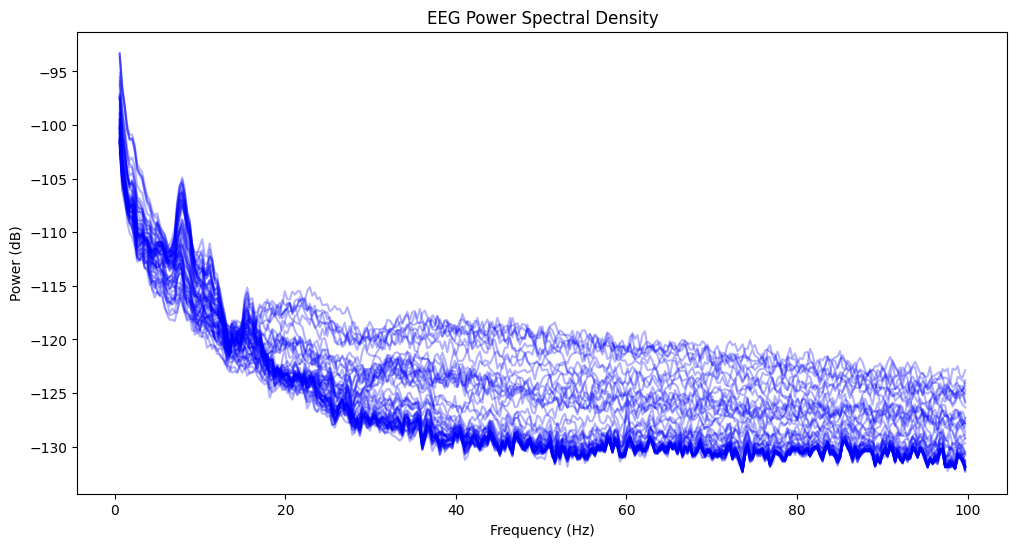

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Compute PSD using the new MNE method
psds, freqs = raw.compute_psd(fmin=0.5, fmax=100, n_fft=2048).get_data(return_freqs=True)

# Convert to dB
psds_db = 10 * np.log10(psds)

# Plot PSD for all EEG channels
plt.figure(figsize=(12, 6))
plt.plot(freqs, psds_db.T, color='blue', alpha=0.3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.title('EEG Power Spectral Density')
plt.show()